# Scraping NYT Articles and using NLP methods 
This is to identify and learn about potential EdTech donors!  

In [131]:
# might need to use Beautiful Soup and Pickle for this work too.
import requests
import os
from pprint import pprint

#my usual suspects
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

import dateutil
from dateutil.relativedelta import relativedelta

from wordcloud import WordCloud, STOPWORDS

In [113]:
nyt_apikey = open('../nyt_apikey.txt','r')

In [114]:
file = nyt_apikey.read().splitlines()

In [115]:
myapikey = file[0]

In [116]:
apikey = os.getenv('NYTIMES_APIKEY', myapikey)

## Look up for current top stories:
https://developer.nytimes.com/docs/top-stories-product/1/overview

In [64]:
section = "education"
query_url = f"https://api.nytimes.com/svc/topstories/v2/{section}.json?api-key={apikey}"

r = requests.get(query_url)
#pprint(r.json())

## Article Search Endpoint
https://developer.nytimes.com/docs/articlesearch-product/1/routes/articlesearch.json/get

In [117]:
query = "education"
begin_date = "20210925" # YYYYMMDD
#filter_query = "\"body:(\"space\") AND glocations:(\"BOSTON\")\""
#filter_query = "\"news_desk:(\"education\") AND body:(\"fund\") AND glocations:(\"NEW YORK CITY\")\""
filter_query = "\"news_desk: (\"education\") AND body:(\"fundraising\") \""
page = "0" # <0-100>
sort = "relevance" # newest, oldest

query_url = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?" \
f"q={query}" \
f"&api-key={apikey}" \
f"&begin_date={begin_date}" \
f"&fq={filter_query}" \
f"&page={page}" \
f"&sort={sort}" \

r = requests.get(query_url)

jsonfile = r.json()
#pprint(jsonfile)

In [118]:
jsonfile.keys()

dict_keys(['status', 'copyright', 'response'])

In [119]:
len(jsonfile['response']['docs'])

10

In [120]:
articles = jsonfile['response']['docs']
articles[0].keys()

dict_keys(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section', 'print_page', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri'])

In [121]:
data = {'abstract': [],
        'web_url': [],
        'lead_paragraph': [],
        'headline': [],  
        'date': [], 
        'doc_type': [],
        'material_type': [],
        'keywords': []}

In [122]:
# def get_articles(file):
    
#     article_results = []
    
#     for i in range(len(file)):
#         article_dict = {}
        
#         article_dict['web_url'] = file[i]['web_url']
#         article_dict['abstract'] = file[i]['abstract']
        
#         article_results.append(article_dict)
        
#     return article_results

# list_articles = get_articles(jsonfile['response']['docs'])

In [123]:
for article in articles:
    data['abstract'].append(article['abstract'])
    data['web_url'].append(article['web_url'])
    data['lead_paragraph'].append(article['lead_paragraph'])
    data['headline'].append(article['headline']['main'])
    data['date'].append(article['pub_date'])
    data['doc_type'].append(article['document_type'])
    data['material_type'].append(article['type_of_material'])
    
    keywords = [keyword['value'] for keyword in article['keywords'] if keyword['name'] == 'subject']
    data['keywords'].append(keywords)

In [124]:
df = pd.DataFrame(data) 

In [127]:
df['date'] = pd.to_datetime(df['date'])

In [129]:
df.head(2)

,abstract,web_url,lead_paragraph,headline,date,doc_type,material_type,keywords
0,Some districts have established robust virus t...,https://www.nytimes.com/2021/09/25/health/scho...,"SAN ANTONIO — One recent Thursday, Ciara Brown...","‘I Need an Army’: Across America, Schools Cram...",2021-09-25 13:00:13+00:00,article,News,"[your-feed-science, Tests (Medical), Education..."
1,The rulings were the second and third the last...,https://www.nytimes.com/2021/09/25/us/tennesse...,Two federal judges in Tennessee have dealt blo...,Two more federal judges rule against the Tenne...,2021-09-25 17:24:59+00:00,article,News,"[Special Education, Masks, Coronavirus (2019-n..."


In [132]:
df['abstract']

0    Some districts have established robust virus t...
1    The rulings were the second and third the last...
2    The mandate, which affects well over 150,000 p...
3    President Biden’s infrastructure plan would cr...
4    Adam Simon Levine’s debut puzzle speaks to us,...
5    Vera Lutter evaded wildfires and sacrificed me...
6    Priyanka Sethy and Matthew Stock put us to the...
7    Exposing the complicated truth of America's pa...
8    Thirty years after she testified before the Se...
9    The ranks of home health aides are expected to...
Name: abstract, dtype: object

In [138]:
my_wc = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                #stopwords = stop_words, 
                min_font_size = 10).generate(str(df['abstract']))

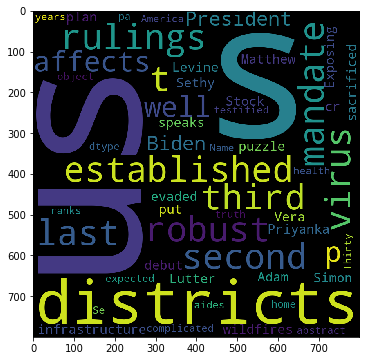

In [142]:
plt.figure(figsize=(8,6))
plt.imshow(my_wc)